# Project: Investigate how developers are transitioning into tech
## Introduction
### Dataset Description



To proceed with this analysis, I would be answering some Questions which are:

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in the data and
df = pd.read_csv('survey_results_public.csv')

print(df.shape)

#Extracting the columns we need
df_new = df.iloc[:,np.r_[0,5,6,7,8,11,19:37,39:43,58]].reset_index(drop=True)



(73268, 79)


##### There are 73,268 rows and 79 columns (i.e this data consists of 73,268 developers responses to 79 questions/sub-questions.                        The columns/questions we will be working with are printed below

In [30]:
df_new.columns,df_new.index

(Index(['ResponseId', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
        'LearnCodeCoursesCert', 'DevType', 'LanguageHaveWorkedWith',
        'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
        'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
        'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
        'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
        'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
        'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
        'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
        'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
        'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
        'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
        'WorkExp'],
       dtype='object'),
 RangeIndex(start=0, stop=73268, step=1))

## Data Cleaning

Since most of our analysis is career based, we remove the null rows w.r.t to DevType column. And obtain the unique reponses for the multi-choice questions.

In [3]:
# Handling missing data
# Drop rows with no response to ''Which of the following describes your current job?''
df_new.dropna(subset =['DevType'],inplace=True)

df_new=df_new.reset_index(drop=True)

#df_new.dtypes

In [4]:
#Total number of response to the question 'Which of the following describes your current job?' (DevType) is 61302
df_new['DevType'].shape[0]

61302

In [5]:

def unique_answers(column):
    '''
    
    This function obtains the unique answers(provided options) for any given question.
    
    INPUT 
        df - dataframe
        column - the column name you want to obtain the unique answers from.
        
    OUTPUT
    
        Unique_ans - A set containing all the possible (unique) answers in the column
    '''
    df1=df_new.dropna(subset = [column])
    Unique_vals = set()
    df1[column]=df1[column].str.split(';')
    for row in df1[column]:
        for role in row:
            Unique_vals.add(role)
    return(Unique_vals)



In [6]:
'''
Calling the function to obtain the possible(unique) answers for the necessary columns
Current & Next will always be the same.
'''
Unique_roles = unique_answers('DevType')
Unique_current_languages = unique_answers('LanguageHaveWorkedWith')
Unique_next_languages = unique_answers('LanguageWantToWorkWith')
Unique_current_db = unique_answers('DatabaseHaveWorkedWith')
Unique_next_db = unique_answers('DatabaseWantToWorkWith')
Unique_current_platform = unique_answers('PlatformHaveWorkedWith')
Unique_next_platform = unique_answers('PlatformWantToWorkWith')
Unique_current_Webframe = unique_answers('WebframeHaveWorkedWith')
Unique_next_Webframe = unique_answers('WebframeWantToWorkWith')
     


C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/1741093959.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=df1[column].str.split(';')


In [7]:
def split_multiple_answers(column):
    '''
    This function split the column with multiple answers and convert each cell into a string
    df - dataframe

    INPUT 
        
        column - the column name with multiple answers that needs to be splitted
        
    OUTPUT
    
        Splitted_col - A set containing all unique answers in the different rows
    '''
    df = df_new.dropna(subset = [column])
    df[column] = df[column].str.split(';')
    
    return(df[column])


df_new['DevType'] = split_multiple_answers('DevType')

In [36]:
df_new['DevType']

0        [Data scientist or machine learning specialist...
1                                  [Developer, full-stack]
2        [Developer, front-end, Developer, full-stack, ...
3                         [Developer, full-stack, Student]
4                                    [Developer, back-end]
                               ...                        
61297                                [Developer, back-end]
61298      [Data scientist or machine learning specialist]
61299    [Developer, full-stack, Developer, desktop or ...
61300    [Developer, front-end, Developer, desktop or e...
61301    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [8]:
'''
Using Pandas melt function to convert list-like column elements to separate rows 

1. Split DevType column list values (columns with individual list values are created).

2. Merge the new columns with the rest of the data set.

3. Drop the old names list column and then transform the new columns into separate rows using the melt function.

4. Additional column ‘variable’ containing the ids of the numeric columns is seen. This column is dropped and empty values are removed.'''

df_clean=df_new.DevType.apply(pd.Series) \
   .merge(df_new, right_index = True, left_index = True) \
   .drop(["DevType"], axis = 1) \
   .melt(id_vars = df.iloc[:,np.r_[0,5,6,7,8,19:37,39:43,58]], value_name = "DevType")\
   .dropna(subset=['DevType'])\
   .drop("variable", axis=1) 





##### Responses to the question 'Which of the following describes your current job? Please select all that apply.' is now splitted into different rows according to the respective ids.


In [17]:
df_clean.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
0,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,NaN,Data scientist or machine learning specialist
1,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,NaN,"Developer, full-stack"
2,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, front-end"
3,8,I am a developer by profession,"Not employed, but looking for work",NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,NaN,...,Linux-based;macOS,Windows,Git,Command-line,NaN,NaN,Google Chat;Microsoft Teams;Zoom,NaN,NaN,"Developer, full-stack"
4,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,6,...,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,6.0,"Developer, back-end"
5,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,30,...,Windows,Windows,Git,Version control hosting service web GUI;Dedica...,NaN,NaN,Google Chat;Slack,Google Chat;Slack,NaN,"Developer, desktop or enterprise applications"
6,11,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,NaN,5,2,...,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,NaN,"Developer, full-stack"
7,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,10,...,Linux-based;macOS;Windows,Linux-based;macOS,Git,Code editor;Dedicated version control GUI appl...,Confluence;Jira Work Management;Notion;Trello,Notion;Trello,Cisco Webex Teams;Google Chat;Microsoft Teams;...,Slack,14.0,Engineering manager
8,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,5,...,macOS,Linux-based,Git,Code editor;Command-line,Jira Work Management;Trello,Jira Work Management;Trello,Microsoft Teams;Slack;Zoom,Microsoft Teams;Slack,5.0,"Developer, full-stack"
9,14,I am a developer by profession,"Employed,

In [38]:
df_new.DevType[2]

['Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test']

In [32]:
df_clean[df_clean.ResponseId==5]

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
2,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, front-end"
61304,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, full-stack"
122606,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, back-end"
183908,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, desktop or enterprise applications"
245210,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, QA or test"


##  Exploratory Data Analysis

Let's ensure that the columns we would be considering for analysis don't contain lots of missing values.

In [39]:
#Which column has most of their values missing
df_clean.columns[df_clean.isnull().mean() >= 0.5]

Index(['LearnCodeCoursesCert', 'OfficeStackAsyncWantToWorkWith'], dtype='object')

In [41]:
'''
This shows that 2 columns have more than half of their values missing - 

LearnCodeCoursesCert   and OfficeStackAsyncWantToWorkWith

'''
#df_new.isnull().mean()
df_clean.isnull().mean()

ResponseId                        0.000000
MainBranch                        0.000000
Employment                        0.000000
RemoteWork                        0.033570
EdLevel                           0.001311
LearnCode                         0.001165
LearnCodeOnline                   0.270726
LearnCodeCoursesCert              0.582723
YearsCode                         0.004424
YearsCodePro                      0.163833
OrgSize                           0.174106
LanguageHaveWorkedWith            0.005735
LanguageWantToWorkWith            0.059099
DatabaseHaveWorkedWith            0.099848
DatabaseWantToWorkWith            0.214176
PlatformHaveWorkedWith            0.234948
PlatformWantToWorkWith            0.361624
WebframeHaveWorkedWith            0.190813
WebframeWantToWorkWith            0.293027
MiscTechHaveWorkedWith            0.313417
MiscTechWantToWorkWith            0.424832
ToolsTechHaveWorkedWith           0.203046
ToolsTechWantToWorkWith           0.301560
NEWCollabTo

In [20]:
df_new['DevType'][10]

['Developer, full-stack', 'Academic researcher', 'DevOps specialist']

Let's find the proportion of each role

From the code below, the majority of respondents are Developers 

In [10]:
DevType_count=(df_clean['DevType'].value_counts()/df_new['DevType'].shape[0]).mul(100).reset_index().rename(columns={'index':'Role','DevType':'count'})
DevType_count.columns=['Role','count']
DevType_count

,Role,count
0,"Developer, full-stack",46.819027
1,"Developer, back-end",43.383576
2,"Developer, front-end",25.961633
3,"Developer, desktop or enterprise applications",15.572086
4,"Developer, mobile",12.453101
5,DevOps specialist,10.064924
6,Student,9.126945
7,Cloud infrastructure engineer,8.617990
8,Database administrator,8.048677
9,System administrator,8.006264


<function matplotlib.pyplot.show(close=None, block=None)>

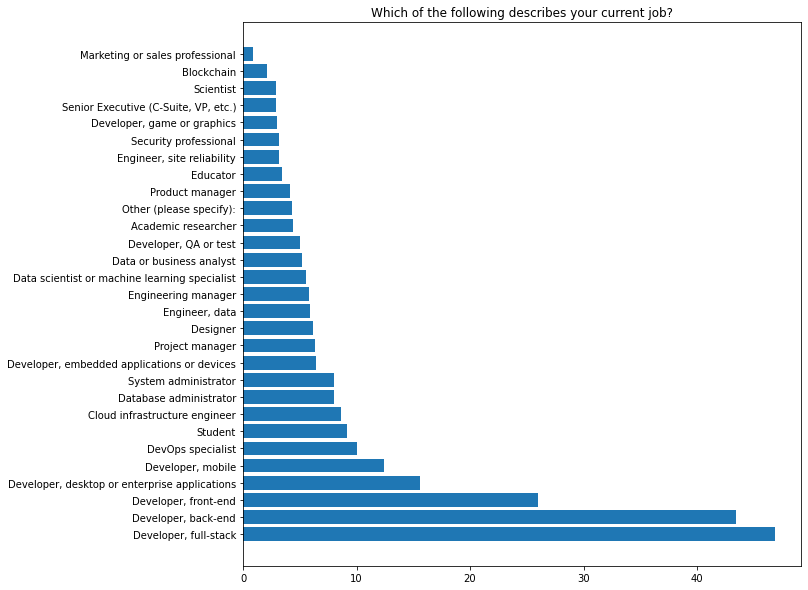

In [43]:
# A horizontal bar chart showing the proportion

plt.figure(figsize=(10,10))
plt.barh(DevType_count['Role'],DevType_count['count'])
plt.title("Which of the following describes your current job?")
plt.show


The roles we would be considering are;
1. Data or business analyst
2. Data scientist or machine learning specialist
3. Developer, back-end
4. Developer, front-end
5. Developer, full-stack
6. DevOps specialist
7. Designer
8. Developer, embedded applications or devices

#### The average years of experience for the different roles

In [583]:
#The average years of experience for the different roles
df_clean.groupby(['DevType'])['WorkExp'].mean().sort_values()


DevType
Student                                           5.032353
Developer, front-end                              9.822250
Developer, mobile                                10.379075
Data scientist or machine learning specialist    10.380952
Developer, full-stack                            10.386392
Developer, back-end                              10.651393
Blockchain                                       10.679144
Academic researcher                              10.806090
Developer, QA or test                            11.554845
Engineer, data                                   11.702923
Developer, game or graphics                      11.969399
Cloud infrastructure engineer                    12.189419
DevOps specialist                                12.407099
Scientist                                        12.410169
Developer, embedded applications or devices      12.638144
Engineer, site reliability                       13.036458
Developer, desktop or enterprise applications   

In [9]:

#What proportion of values are missing on each column w.r.t the DevType column
# Create a DataFrame index object/pandas series
idx = pd.Index(sorted(Unique_roles))
#idx = pd.Series(sorted(Unique_roles))


Describe= pd.DataFrame()

for role in sorted(Unique_roles):
    Describe=Describe.append(df_clean[df_clean['DevType']==role].isnull().mean(),ignore_index=True)
    #Describe=pd.concat([Describe,pd.Series(role)])
    
# Set the above DataFrame index object as the index
# using set_index() function
Describe.set_index(idx,inplace=True)
Describe


,ResponseId,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
Academic researcher,0.0,0.001107,0.002215,0.310447,0.660391,0.011074,0.064599,0.310078,0.447398,0.433739,...,0.057217,0.017350,0.008859,0.056478,0.514581,0.673311,0.095607,0.301956,0.539313,0.0
Blockchain,0.0,0.002304,0.003072,0.281106,0.557604,0.013057,0.075269,0.111367,0.263441,0.180492,...,0.082181,0.019201,0.005376,0.026882,0.228879,0.453149,0.122888,0.329493,0.425499,0.0
Cloud infrastructure engineer,0.0,0.000568,0.000757,0.274276,0.589816,0.003596,0.057732,0.054325,0.164111,0.044293,...,0.032936,0.007382,0.002082,0.009275,0.212569,0.462995,0.039182,0.208404,0.309483,0.0
Data or business analyst,0.0,0.001562,0.000937,0.246798,0.492971,0.008435,0.073102,0.085911,0.207435,0.255858,...,0.054983,0.017182,0.007810,0.096845,0.359575,0.541081,0.087160,0.272102,0.404561,0.0
Data scientist or machine learning specialist,0.0,0.000876,0.000876,0.286215,0.533879,0.004089,0.057827,0.165012,0.311040,0.241530,...,0.047313,0.014311,0.004965,0.047897,0.323890,0.525409,0.070678,0.264019,0.417348,0.0
Database administrator,0.0,0.001419,0.001013,0.249493,0.604378,0.004054,0.063032,0.025132,0.116336,0.219092,...,0.045602,0.011350,0.005067,0.061005,0.365829,0.548439,0.118160,0.299554,0.387921,0.0
Designer,0.0,0.002391,0.001328,0.241764,0.583953,0.008767,0.073592,0.121945,0.248937,0.295962,...,0.060840,0.015409,0.007705,0.072795,0.391870,0.560043,0.144793,0.342721,0.484857,0.0
DevOps specialist,0.0,0.000324,0.000972,0.262237,0.590276,0.004214,0.053160,0.057699,0.169206,0.115721,...,0.033712,0.007780,0.001945,0.008590,0.227877,0.465640,0.046353,0.218801,0.319611,0.0
"Developer, QA or test",0.0,0.002261,0.001615,0.249031,0.563307,0.005168,0.064276,0.106266,0.231912,0.251938,...,0.044574,0.012274,0.003230,0.024871,0.279070,0.481589,0.067829,0.257752,0.343346,0.0
"Developer, back-end",0.0,0.001166,0.000978,0.293063,0.589284,0.003497,0.052228,0.061102,0.168490,0.219853,...,0.039067,0.008836,0.002369,0.019214,0.273059,0.495055,0.079601,0.263019,0.357473,0.0


In [12]:
Describe.head()
#print(f' Missing values:', {role},Describe.append(df_clean[df_clean['DevType']==role].isnull().mean(),ignore_index=True))


,ResponseId,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
Academic researcher,0.0,0.001107,0.002215,0.310447,0.660391,0.011074,0.064599,0.310078,0.447398,0.433739,...,0.057217,0.017350,0.008859,0.056478,0.514581,0.673311,0.095607,0.301956,0.539313,0.0
Blockchain,0.0,0.002304,0.003072,0.281106,0.557604,0.013057,0.075269,0.111367,0.263441,0.180492,...,0.082181,0.019201,0.005376,0.026882,0.228879,0.453149,0.122888,0.329493,0.425499,0.0
Cloud infrastructure engineer,0.0,0.000568,0.000757,0.274276,0.589816,0.003596,0.057732,0.054325,0.164111,0.044293,...,0.032936,0.007382,0.002082,0.009275,0.212569,0.462995,0.039182,0.208404,0.309483,0.0
Data or business analyst,0.0,0.001562,0.000937,0.246798,0.492971,0.008435,0.073102,0.085911,0.207435,0.255858,...,0.054983,0.017182,0.007810,0.096845,0.359575,0.541081,0.087160,0.272102,0.404561,0.0
Data scientist or machine learning specialist,0.0,0.000876,0.000876,0.286215,0.533879,0.004089,0.057827,0.165012,0.311040,0.241530,...,0.047313,0.014311,0.004965,0.047897,0.323890,0.525409,0.070678,0.264019,0.417348,0.0


### TopTechnologies/tools developers are currently using and what they want to use.

In [11]:
#Calling the function to obtain the possible(unique) answers for the necessary columns

df_clean['LanguageHaveWorkedWith']= split_multiple_answers('LanguageHaveWorkedWith')
df_clean['LanguageWantToWorkWith']=split_multiple_answers('LanguageWantToWorkWith')
df_clean['DatabaseHaveWorkedWith']=split_multiple_answers('DatabaseHaveWorkedWith')
df_clean['DatabaseWantToWorkWith']=split_multiple_answers('DatabaseWantToWorkWith')
df_clean['PlatformHaveWorkedWith']=split_multiple_answers('PlatformHaveWorkedWith')
df_clean['PlatformWantToWorkWith']=split_multiple_answers('PlatformWantToWorkWith')
df_clean['WebframeHaveWorkedWith']=split_multiple_answers('WebframeHaveWorkedWith')
df_clean['WebframeWantToWorkWith']=split_multiple_answers('WebframeWantToWorkWith')

C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/3733984865.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(';')


#### Programming, scripting, and markup languages

C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


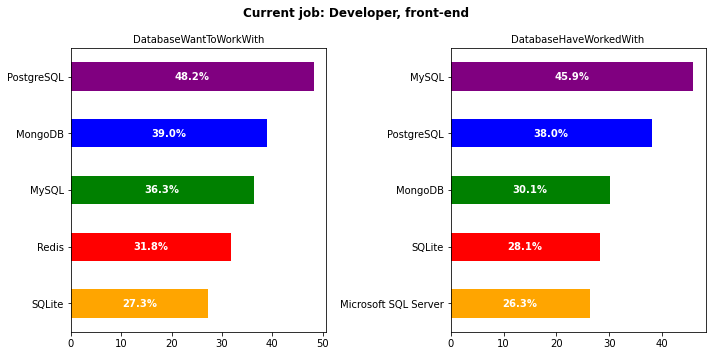

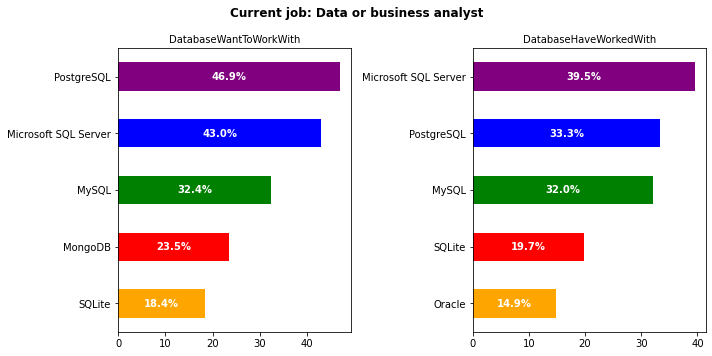

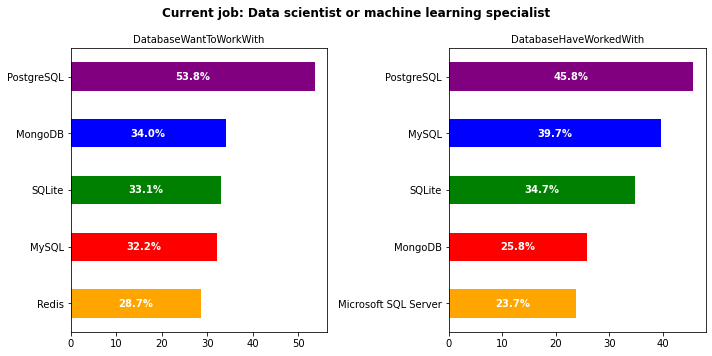

KeyboardInterrupt: 

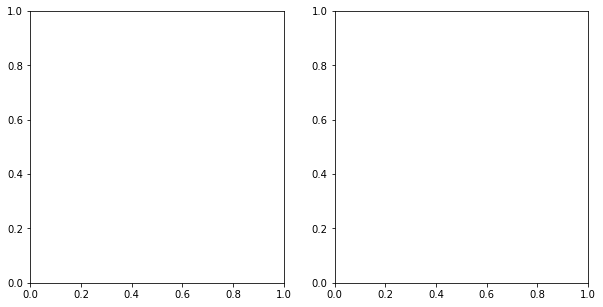

In [33]:
'''

Using Pandas melt function to convert list-like column elements to separate rows 

1. Split DevType column list values (columns with individual list values are created).

2. Merge the new columns with the rest of the data set.

3. Drop the old names list column and then transform the new columns into separate rows using the melt function.

4. Additional column ‘variable’ containing the ids of the numeric columns is seen. This column is dropped and empty values are removed.

'''
def plot(col1,col2,role):
        fig, axs = plt.subplots(1,2,figsize=(10,5))
        
        
        df1 = df_clean[col1].apply(pd.Series) \
        .merge(df_clean, right_index = True, left_index = True) \
        .drop([col1], axis = 1) \
        .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
        .dropna(subset=[col1])\
        .drop("variable", axis=1) 

        f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]



        
       
        df2 = df_clean[col2].apply(pd.Series) \
        .merge(df_clean, right_index = True, left_index = True) \
        .drop([col2], axis = 1) \
        .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
        .dropna(subset=[col1])\
        .drop("variable", axis=1) 

        g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]



        f.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
        axs[0].set_title(col1, fontsize='medium')
        #axs[0].plot(f.T[role].sort_values(ascending=False).head(5), color='blue')    

        g.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
        axs[1].set_title(col2, fontsize='medium')

        #axs[1].plot(g.T[role].sort_values(ascending=False).head(5), color='green') 


        for c in axs[0].containers:
        # set the bar label
            axs[0].bar_label(c, fmt="%.1f%%",fontweight ='bold', label_type='center',color='white')
        for c in axs[1].containers:
        # set the bar label
            axs[1].bar_label(c, fmt='%.1f%%',fontweight ='bold', label_type='center',color='white')
        fig.suptitle(f'Current job: {role}',fontweight ='bold')
        fig.tight_layout()
        return(plt.show())
    
#plot('DatabaseWantToWorkWith','Developer, front-end','DatabaseHaveWorkedWith')



In [ ]:
df_clean.shape[0]

### Insights- programming, scripting, and markup languages
#### SQL and Python remain the two top languages for Data or business analyst and Data scientist or machine learning specialist. 
#### Over 70% in these 2 categories want to continue or start working with Python next year. Over 20% worked with JavaScript and HTML/CSS, this is most likely because these tools are used for web development blahblah.

#### SQL, JavaScript tops the list of most worked with languages for Back-end developers, in the future, Python and SQL are the two top languages these set of developers want to work with / continue working with.

#### JavaScript also remains the top languages Front-end developers and full stack developers want to stick with. HTML/CSS appears second on the list of languages these developers worked with in the past year but is pushed down to 3rd place by TypeScript.


#### For our DevOps specialists, Python and Bash/Shell appear on both lists (HaveWorkedWith  & WantToWorkWith). Go appears 3 on the list of WantToWork With.

#### HTML/CSS, JavaScript, Python are still the most wanted language to work with for designers. 20% have worked with PHP over the past years.

#### C, C++, Python and Bash/Shell are the top tools Developer, embedded applications or devices have worked with and want to continue/start working with. Rust overtakes Bash/Shell in the top 4 WantToWorkWith languages.


C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


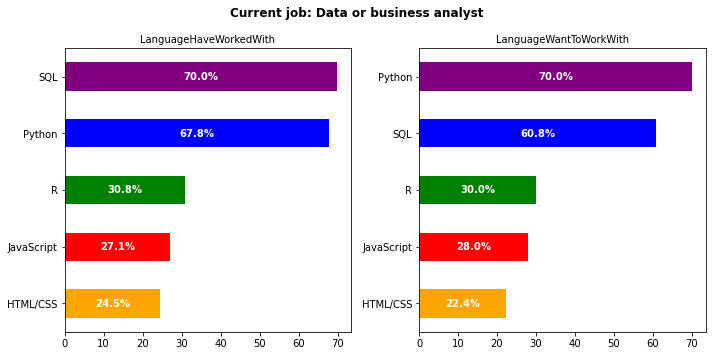

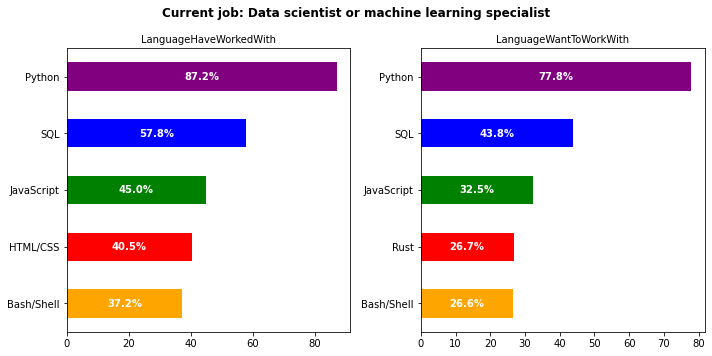

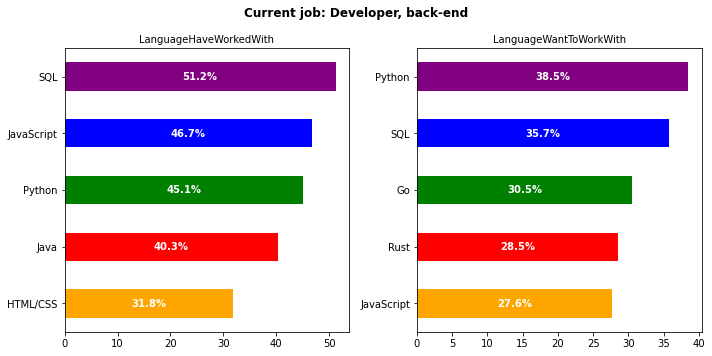

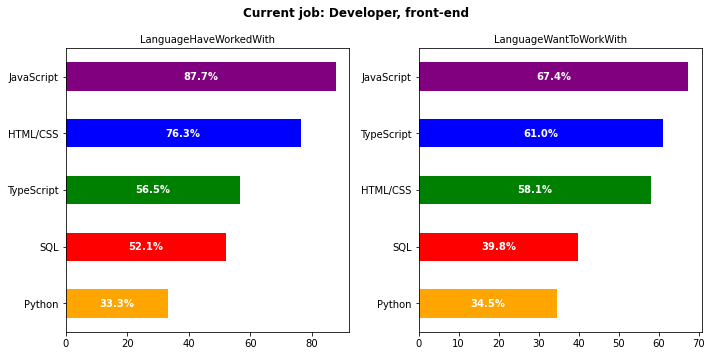

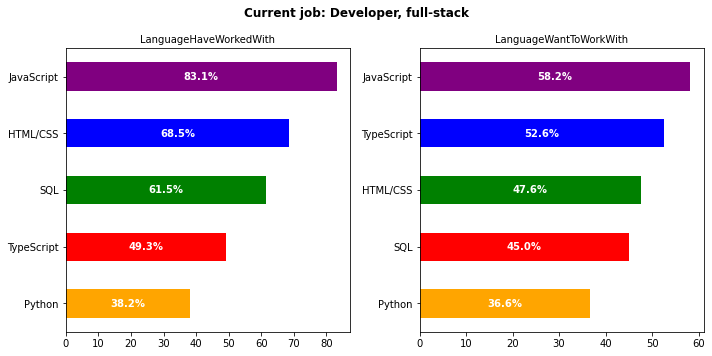

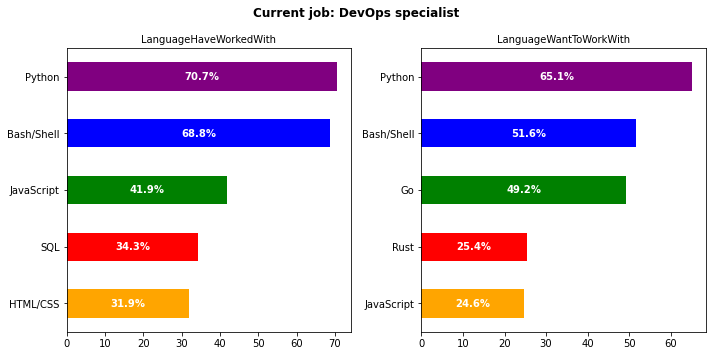

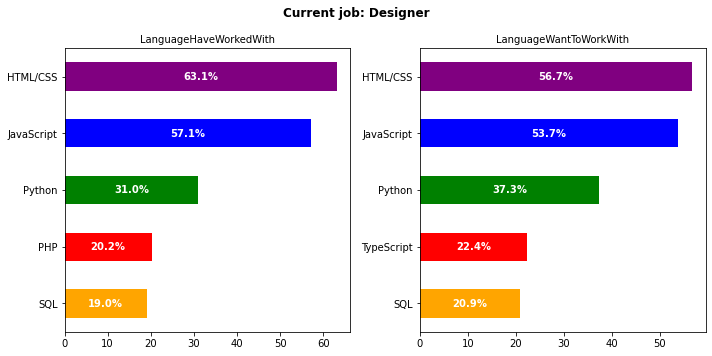

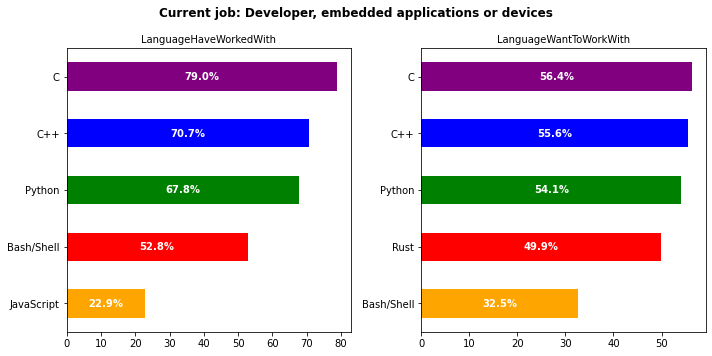

In [45]:
all_roles=['Data or business analyst',
'Data scientist or machine learning specialist',
'Developer, back-end',
'Developer, front-end',
'Developer, full-stack',
'DevOps specialist',
'Designer',
'Developer, embedded applications or devices']
           
           
for role in all_roles:
    plot('LanguageHaveWorkedWith','LanguageWantToWorkWith',role)

### Insights- Cloud platforms
##### AWS remains the most used and wanted cloud platform for Data or business analyst, Data scientist or machine learning specialist, Developer, back-end, Developer, front-end, Developer, full-stack,'DevOps specialist, Developer, embedded applications or devices. And Google Cloud is the most used and wanted cloud platform for Designers.

C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


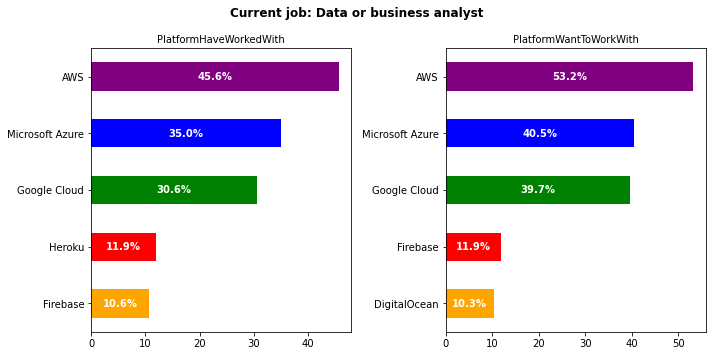

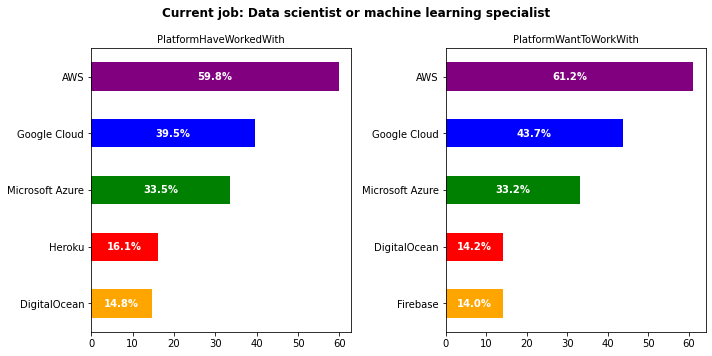

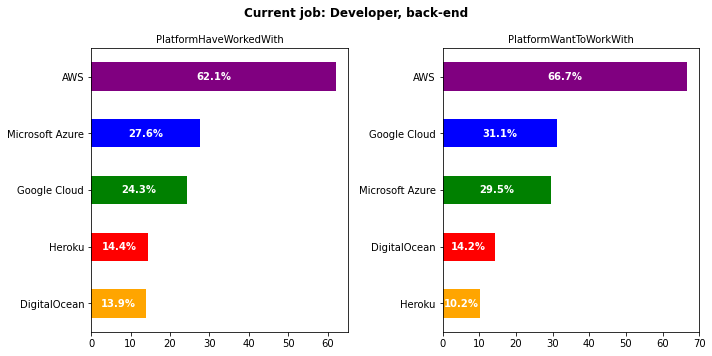

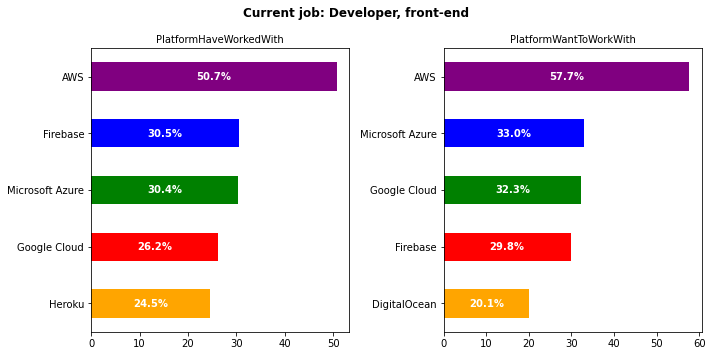

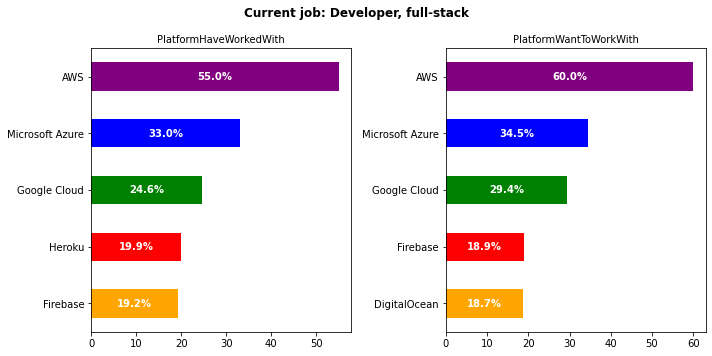

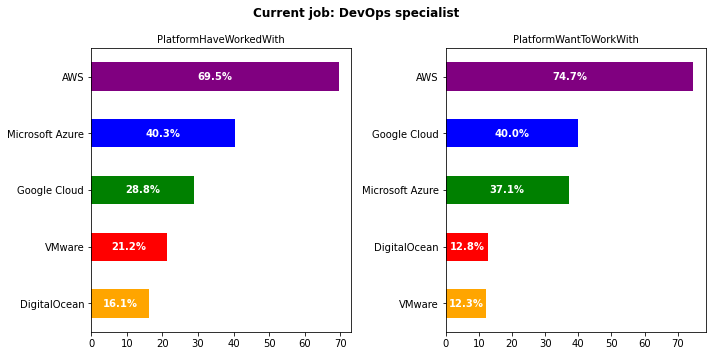

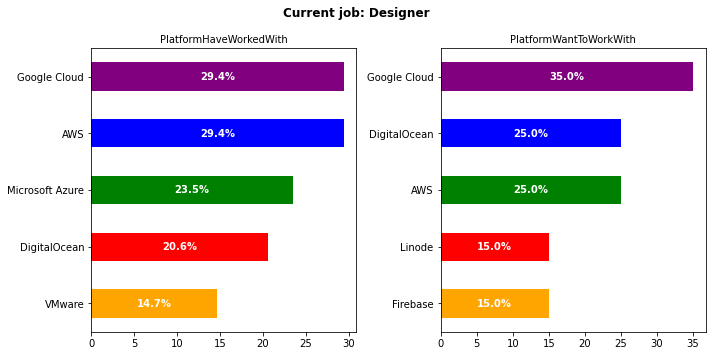

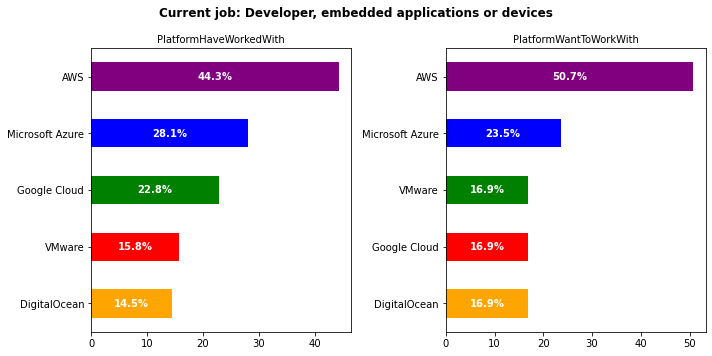

In [46]:
for role in all_roles:
    plot('PlatformHaveWorkedWith','PlatformWantToWorkWith',role)
    

### Databases environments

##### PostgreSQL tops the chart of most wanted database environment for Data scientists/ML specialists, Back-end developers, full stack developers, DevOps specialists. And for Data/business analyst, MS SQL Server.

##### Most Front-end developers and Designers want to work/ continue to work with My SQL.

##### Most Embedded applications or devices developerS want to work/ continue to work with SQLite. 

C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_8784/2968815686.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


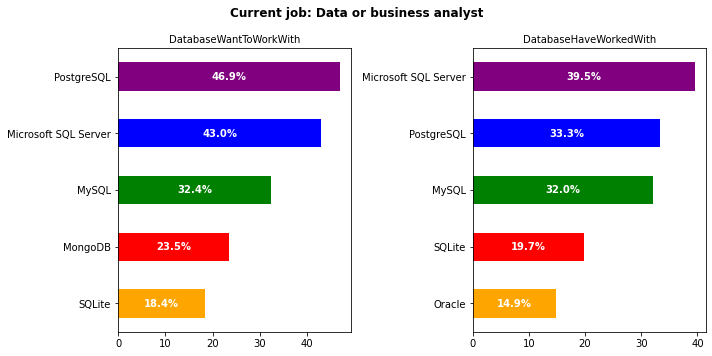

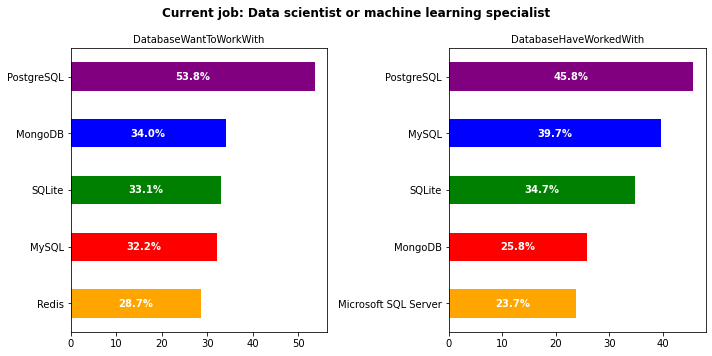

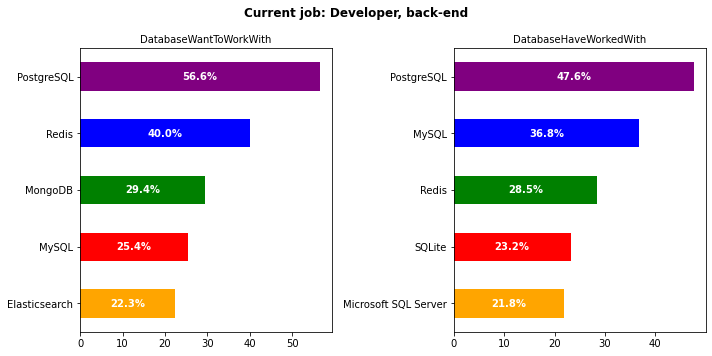

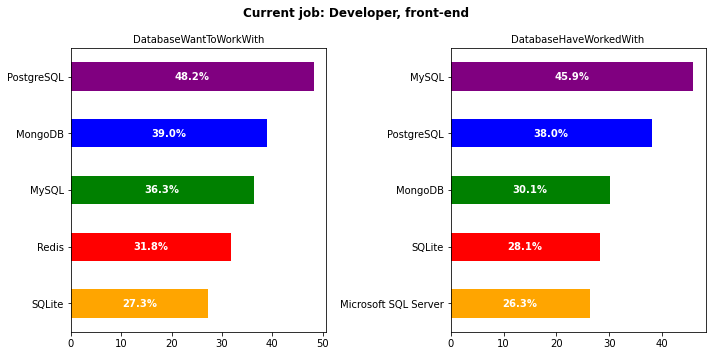

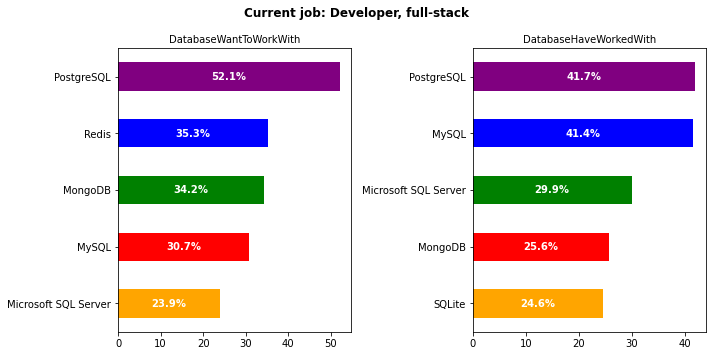

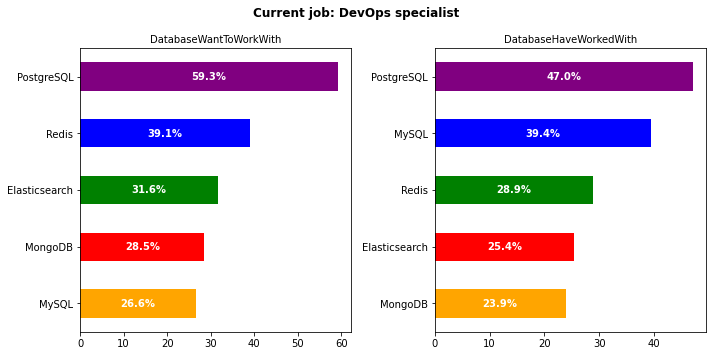

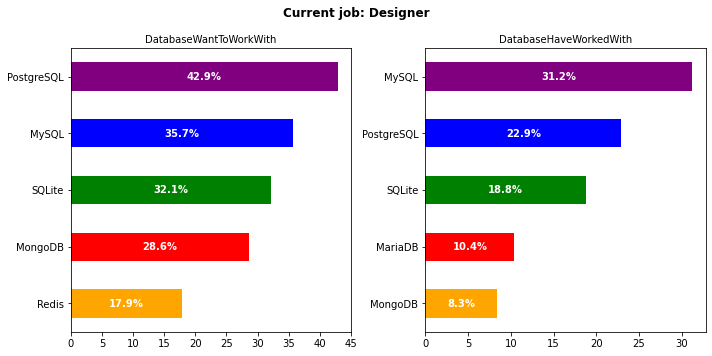

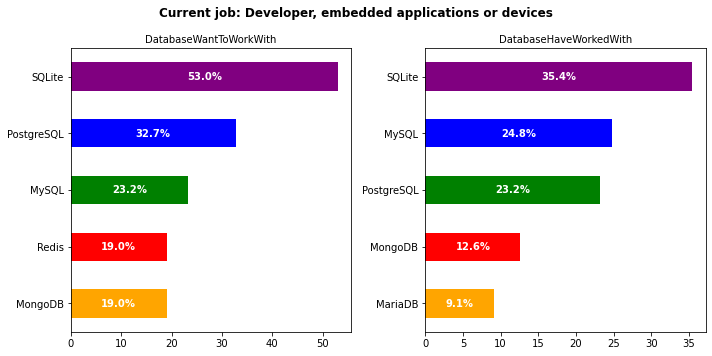

In [37]:
for role in all_roles:
    plot('DatabaseWantToWorkWith','DatabaseHaveWorkedWith',role)

In [469]:
#Unique_current_languages
dd=df_clean['LanguageHaveWorkedWith'].value_counts().reset_index()
dd.rename(columns={ 'LanguageHaveWorkedWith': 'count'}, inplace=True)

dd

,index,count
0,HTML/CSS;JavaScript;TypeScript,2148
1,HTML/CSS;JavaScript;PHP;SQL,1843
2,C#;HTML/CSS;JavaScript;SQL;TypeScript,1451
3,C#;HTML/CSS;JavaScript;SQL,1384
4,Python,1279
...,...,...
21519,Bash/Shell;Dart;Go;HTML/CSS;JavaScript;Python;...,1
21520,C;C++;JavaScript;MATLAB;Python;SQL;TypeScript,1
21521,Bash/Shell;C;C++;Go;Lua;Python,1
21522,Go;Perl;PHP;Python;SQL,1


In [470]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


In [471]:
gg=total_count(dd,'index','count',Unique_current_languages)


In [472]:
gg

,index,count
20,C,130671
33,Java,129270
14,JavaScript,116378
25,HTML/CSS,98440
10,SQL,96460
3,Python,79096
11,TypeScript,65287
26,Bash/Shell,56496
34,C#,53657
2,PHP,43068


In [60]:
f.T[role]/(df_clean[df_clean['DevType'] == role]).shape[0]

LanguageHaveWorkedWith
APL            0.000008
Assembly       0.001123
Bash/Shell     0.002779
C              0.004161
C#             0.000970
C++            0.003725
COBOL          0.000024
Clojure        0.000008
Crystal        0.000016
Dart           0.000040
Delphi         0.000057
Elixir         0.000016
Erlang         0.000032
F#             0.000008
Fortran        0.000032
Go             0.000355
Groovy         0.000170
HTML/CSS       0.001002
Haskell        0.000105
Java           0.000816
JavaScript     0.001204
Julia          0.000057
Kotlin         0.000218
LISP           0.000105
Lua            0.000315
MATLAB         0.000695
OCaml          0.000008
Objective-C    0.000113
PHP            0.000307
Perl           0.000210
PowerShell     0.000493
Python         0.003571
R              0.000081
Ruby           0.000178
Rust           0.000929
SAS            0.000000
SQL            0.000776
Scala          0.000040
Solidity       0.000000
Swift          0.000121
TypeScript     0.

# Learn how to code 

Questions in this section are:
##### How did you learn to code?(LearnCode)
##### What online resources do you use to learn to code?(LearnCodeOnline)
##### What online courses or certifications do you use to learn to code?(LearnCodeCoursesCert)

In [57]:
df_clean[['LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert']]

,LearnCode,LearnCodeOnline,LearnCodeCoursesCert
0,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN
1,"Books / Physical media;School (i.e., Universit...",NaN,NaN
2,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN
3,Online Courses or Certification,NaN,Coursera;Udemy
4,On the job training;Coding Bootcamp,NaN,NaN
...,...,...,...
1764589,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,Coursera;Udemy;Codecademy;Pluralsight;edX;Udac...
1768822,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,Coursera;Udemy;Codecademy;Pluralsight;edX;Udac...
1773947,Books / Physical media,NaN,NaN
1774051,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,Coursera;Udemy;Codecademy;Pluralsight;edX;Udac...


In [10]:
#Calling the function to obtain the possible(unique) answers for the necessary columns

df_clean['LearnCode']= split_multiple_answers('LearnCode')
df_clean['LearnCodeOnline']=split_multiple_answers('LearnCodeOnline')
df_clean['LearnCodeCoursesCert']=split_multiple_answers('LearnCodeCoursesCert')


C:\Users\jobao\AppData\Local\Temp/ipykernel_6896/164317998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(';')


In [119]:
(df_clean.dropna(subset=['LearnCode'])[df_clean['DevType'] =='Developer, back-end']).shape[0]
(df_cleandf_clean[df_clean['DevType'] =='Developer, back-end']).shape[0]

C:\Users\jobao\AppData\Local\Temp/ipykernel_10676/4125361866.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df_clean.dropna(subset=['LearnCode'])[df_clean['DevType'] =='Developer, back-end']).shape[0]


10478

In [13]:
col1 = 'LearnCode'
col2 = 'LearnCodeOnline'
col3 = 'LearnCodeCoursesCert'
role='Developer, back-end'
df3=df_clean[col3].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col3], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col3], value_name = col3)\
       .dropna(subset=[col3])\
       .drop("variable", axis=1) 

h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]  
    
print(h.T[role].sort_values().tail(5))

df2=df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]  
    
print(g.T[role].sort_values().tail(5))

df1=df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]  
    
print(f.T[role].sort_values().tail(5))

C:\Users\jobao\AppData\Local\Temp/ipykernel_6896/2153574582.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]


LearnCodeCoursesCert
Other          19.035597
Codecademy     21.004797
Pluralsight    26.331734
Coursera       38.424640
Udemy          68.038374
Name: Developer, back-end, dtype: float64


C:\Users\jobao\AppData\Local\Temp/ipykernel_6896/2153574582.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


LearnCodeOnline
How-to videos              52.512489
Written Tutorials          58.565971
Blogs                      78.225096
Stack Overflow             84.263885
Technical documentation    90.669997
Name: Developer, back-end, dtype: float64
LearnCode
Online Courses or Certification                        42.908952
On the job training                                    44.378698
Books / Physical media                                 60.326398
Other online resources (e.g., videos, blogs, forum)    65.031495
School (i.e., University, College, etc)                68.161863
Name: Developer, back-end, dtype: float64


C:\Users\jobao\AppData\Local\Temp/ipykernel_6896/2153574582.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]


##### The majority of developers, as we can see, learn to code from online resources. It seems to be the trend to educate yourself outside of the university system and it is very important to take this very seriously as a beginner. We see that developers frequently use Udemy and Coursera for online courses/certifications, technical documentation to properly learn a tool/ framework and Stack overflow for quick tips and solutions to programming problems (online resources). 
##### In general, online courses/certifications are a good place to start. As you learn, supplement your learning with StackOverflow and technical documentation.

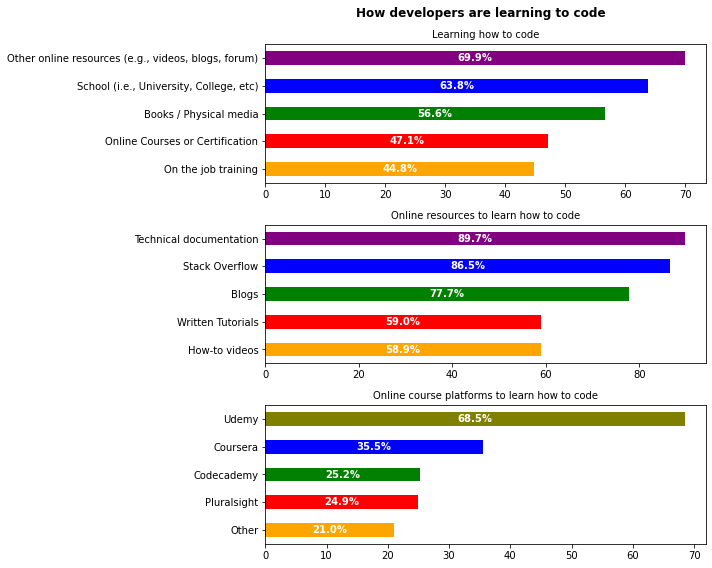

In [32]:
# Without role aggregation


def clean_and_plot():
    col1 = 'LearnCode'
    col2 = 'LearnCodeOnline'
    col3 = 'LearnCodeCoursesCert'

    df1=df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

    f=df1[col1].value_counts()/(df_clean.dropna(subset=[col1])).shape[0]*100
    
    df2=df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

    #g=df2.groupby(['DevType'])[col2].value_counts(normalize=True).mul(100).unstack().fillna(0)  
    g=df2[col2].value_counts()/(df_clean.dropna(subset=[col2])).shape[0]*100

    
    df3=df_clean[col3].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col3], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col3], value_name = col3)\
       .dropna(subset=[col3])\
       .drop("variable", axis=1) 

    h=df3[col3].value_counts()/(df_clean.dropna(subset=[col3])).shape[0]*100
    fig, axs = plt.subplots(3,figsize=(10, 8))
    #plt.figure(figsize=(20,20))
    
    f.sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[0].set_title('Learning how to code', fontsize='medium')

    #axs[0].set_ylabel(col1,fontweight ='bold',fontsize='large')

    g.sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
   # axs[1].set_ylabel(col2,fontweight ='bold',fontsize='medium')
    axs[1].set_title('Online resources to learn how to code', fontsize='medium')
    
    h.sort_values().tail(5).plot(kind='barh', ax=axs[2],color=['orange', 'red', 'green', 'blue', 'olive'],xlabel='')
    #axs[2].set_ylabel(col3,fontweight ='bold',fontsize='medium')
    axs[2].set_title('Online course platforms to learn how to code', fontsize='medium')


    for c in axs[0].containers:
    # set the bar label
        axs[0].bar_label(c, fmt="%.1f%%", label_type='center',fontweight ='bold',color='white')
    for c in axs[1].containers:
    # set the bar label
        axs[1].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    for c in axs[2].containers:
    # set the bar label
        axs[2].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    fig.suptitle(f'How developers are learning to code',fontweight ='bold',fontsize='large',ha='left')
    fig.tight_layout()
   


    plt.show()
clean_and_plot()

In [15]:
#Calling the function to obtain the possible(unique) answers for the necessary columns

df['LearnCode']= split_multiple_answers('LearnCode')
df['LearnCodeOnline']=split_multiple_answers('LearnCodeOnline')
df['LearnCodeCoursesCert']=split_multiple_answers('LearnCodeCoursesCert')

col1='LearnCodeCoursesCert'
df1=df[col1].apply(pd.Series) \
       .merge(df, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df.loc[:,df.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

#f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])).shape[0]
f=df1[col1].value_counts()/(df.dropna(subset=[col1])).shape[0]*100
f 


C:\Users\jobao\AppData\Local\Temp/ipykernel_6896/164317998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(';')


Udemy          68.457187
Coursera       35.474937
Codecademy     25.203823
Pluralsight    24.907353
Other          21.014238
edX            15.268188
Udacity        14.207139
Skillsoft       1.950458
Name: LearnCodeCoursesCert, dtype: float64

In [90]:
(df.dropna(subset=['LearnCode'])).shape[0]

71580

C:\Users\jobao\AppData\Local\Temp/ipykernel_9600/3223804575.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_9600/3223804575.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_9600/3223804575.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]


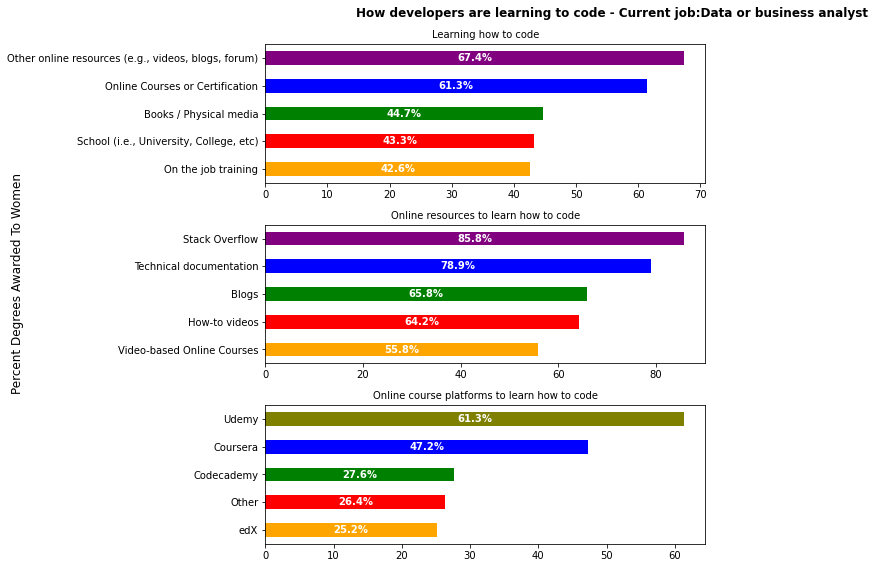

In [62]:
def clean_and_plot(role):
    col1 = 'LearnCode'
    col2 = 'LearnCodeOnline'
    col3 = 'LearnCodeCoursesCert'

    df1=df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

    f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
    
    df2=df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

    #g=df2.groupby(['DevType'])[col2].value_counts(normalize=True).mul(100).unstack().fillna(0)  
    g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]

    
    df3=df_clean[col3].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col3], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col3], value_name = col3)\
       .dropna(subset=[col3])\
       .drop("variable", axis=1) 

    h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]  
    
    fig, axs = plt.subplots(3,figsize=(10, 8))
    #plt.figure(figsize=(20,20))
    
    f.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[0].set_title('Learning how to code', fontsize='medium')

    #axs[0].set_ylabel(col1,fontweight ='bold',fontsize='large')

    g.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
   # axs[1].set_ylabel(col2,fontweight ='bold',fontsize='medium')
    axs[1].set_title('Online resources to learn how to code', fontsize='medium')
    
    h.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[2],color=['orange', 'red', 'green', 'blue', 'olive'],xlabel='')
    #axs[2].set_ylabel(col3,fontweight ='bold',fontsize='medium')
    axs[2].set_title('Online course platforms to learn how to code', fontsize='medium')


    for c in axs[0].containers:
    # set the bar label
        axs[0].bar_label(c, fmt="%.1f%%", label_type='center',fontweight ='bold',color='white')
    for c in axs[1].containers:
    # set the bar label
        axs[1].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    for c in axs[2].containers:
    # set the bar label
        axs[2].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    fig.suptitle(f'How developers are learning to code - Current job:{role}',fontweight ='bold',fontsize='large',ha='left')
    fig.tight_layout()
    fig.supylabel('Learning how to code')


    plt.show()
clean_and_plot('Data or business analyst')

C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]


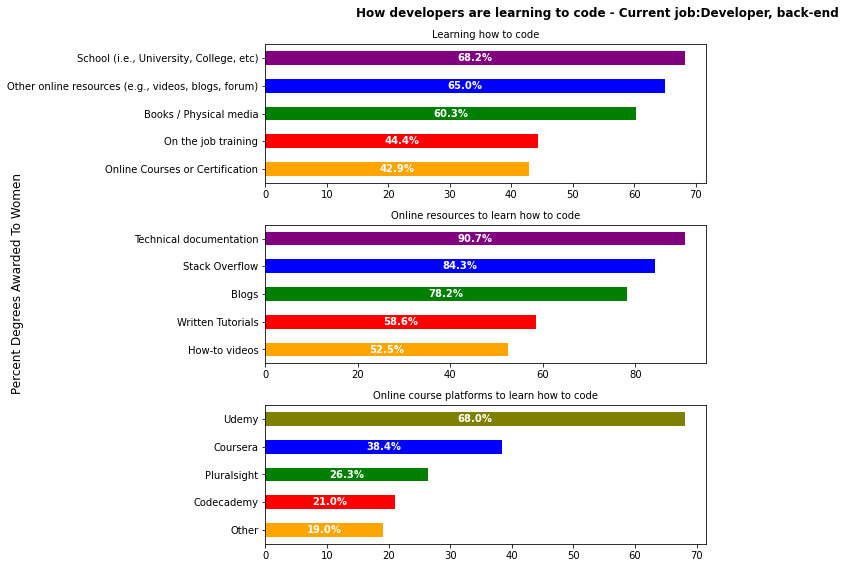

In [59]:
def clean_and_plot(role):
    col1 = 'LearnCode'
    col2 = 'LearnCodeOnline'
    col3 = 'LearnCodeCoursesCert'

    df1=df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

    f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
    
    df2=df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

    #g=df2.groupby(['DevType'])[col2].value_counts(normalize=True).mul(100).unstack().fillna(0)  
    g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]

    
    df3=df_clean[col3].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col3], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col3], value_name = col3)\
       .dropna(subset=[col3])\
       .drop("variable", axis=1) 

    h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]  
    
    fig, axs = plt.subplots(3,figsize=(10, 8))
    #plt.figure(figsize=(20,20))
    
    f.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[0].set_title('Learning how to code', fontsize='medium')

    #axs[0].set_ylabel(col1,fontweight ='bold',fontsize='large')

    g.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
   # axs[1].set_ylabel(col2,fontweight ='bold',fontsize='medium')
    axs[1].set_title('Online resources to learn how to code', fontsize='medium')
    
    h.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[2],color=['orange', 'red', 'green', 'blue', 'olive'],xlabel='')
    #axs[2].set_ylabel(col3,fontweight ='bold',fontsize='medium')
    axs[2].set_title('Online course platforms to learn how to code', fontsize='medium')


    for c in axs[0].containers:
    # set the bar label
        axs[0].bar_label(c, fmt="%.1f%%", label_type='center',fontweight ='bold',color='white')
    for c in axs[1].containers:
    # set the bar label
        axs[1].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    for c in axs[2].containers:
    # set the bar label
        axs[2].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    fig.suptitle(f'How developers are learning to code - Current job:{role}',fontweight ='bold',fontsize='large',ha='left')
    fig.tight_layout()
    fig.supylabel('Learning how to code')


    plt.show()
clean_and_plot('Developer, back-end')

### Highest level of formal education completed

#### I find it really interesting (not surprising though) that people without college degrees are beginning to dominate the tech-space these days. 
#### Clearly ranking third among the most sought-after tech jobs and even challenging designers with master's degrees.

In [229]:
df_clean.groupby('DevType')['EdLevel'].value_counts()
#df_clean.groupby(['DevType'])['LearnCode'].value_counts()

DevType               EdLevel                                                                           
Academic researcher   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       975
                      Other doctoral degree (Ph.D., Ed.D., etc.)                                            754
                      Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          595
                      Some college/university study without earning a degree                                167
                      Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     85
                                                                                                           ... 
System administrator  Associate degree (A.A., A.S., etc.)                                                   222
                      Other doctoral degree (Ph.D., Ed.D., etc.)                                            159

In [34]:
df_clean[df_clean['DevType']=='Designer'].shape[0]

3764

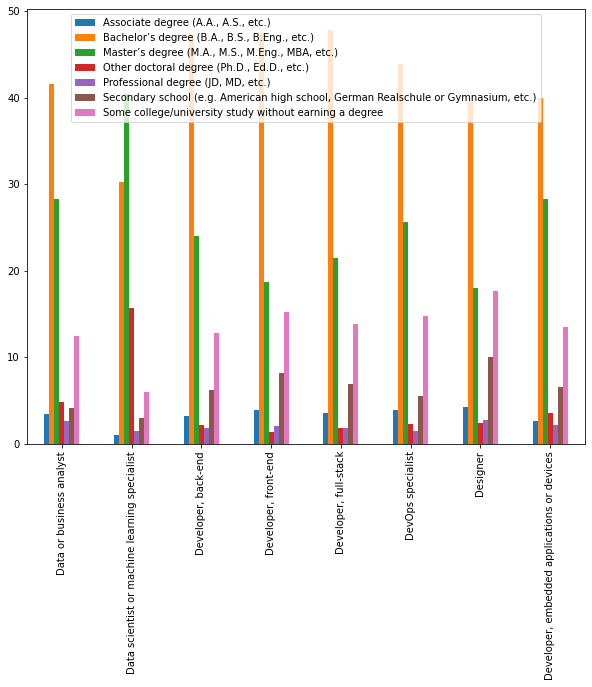

In [101]:
#data.sort_values(['Associate degree (A.A., A.S., etc.)','Bachelor’s degree (B.A., B.S., B.Eng., etc.)','Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)','Professional degree (JD, MD, etc.)','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Some college/university study without earning a degree'],ascending=False).plot(kind='bar',figsize=(10,8))
data.sort_values(rows,axis=0,ascending=False).plot(kind='bar',figsize=(10,8))
plt.legend(loc ='upper center')

In [228]:
df_clean.groupby(['EdLevel']).count()


,ResponseId,MainBranch,Employment,RemoteWork,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,OrgSize,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
EdLevel,,,,,,,,,,,,,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",5597,5597,5597,5367,1988,1432,920,5579,4617,4576,...,5241,5565,5568,5361,3887,2676,5090,3947,3369,5597
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",70836,70836,70836,68698,28053,19359,12331,70638,60900,60305,...,67713,70155,70699,69082,50794,36123,65566,52572,45414,70836
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",39078,39078,39078,38509,14761,9784,5963,38922,35460,34778,...,37597,38695,38937,37880,27474,19826,36420,29882,24898,39078
"Other doctoral degree (Ph.D., Ed.D., etc.)",6040,6040,6040,6000,2058,1248,535,6018,5556,5480,...,5847,5981,6026,5714,3402,2294,5663,4554,3360,6040
Primary/elementary school,2397,2397,2397,2114,617,460,212,2310,1294,1308,...,2073,2276,2321,2085,1474,1021,1646,1163,993,2397
"Professional degree (JD, MD, etc.)",3298,3298,3298,3218,1043,685,476,3284,2835,2788,...,3156,3273,3289,3086,2149,1495,2872,2294,1837,3298
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",11832,11832,11832,10872,4102,3258,1576,11768,7244,7177,...,11150,11753,11802,11303,7547,5270,9826,7198,5145,11832
Some college/university study without earning a degree,23140,23140,23140,22091,7780,5941,3313,23040,18073,17894,...,21989,22941,23059,22297,15722,10874,20506,15843,13088,23140
Something else,2356,2356,2356,2188,787,545,296,2346,1709,1636,...,2155,2270,2337,2158,1383,939,1946,1385,1190,2356
